<a href="https://colab.research.google.com/github/Rishu-N/TENSORFLOW/blob/main/Computer_vision_with_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rishunand","key":"e1001d5cb037597360ca6384ce1c513c"}'}

In [4]:
!mkdir ~/.kaggle

In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets list

ref                                                        title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          20048        621  1.0              
emilrueh/laptops-and-notebooks-from-2020-2023              Laptops and Notebooks from 2020-2023           79KB  2023-09-29 15:14:05            919         27  1.0              
joebeachcapital/students-performance                       Students Performance                            2KB  2023-08-31 00:50:11           7263        179  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023  Credit Card Fraud Detection Dataset 2023      143MB  202

In [10]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:17<00:00, 215MB/s]
100% 2.29G/2.29G [00:17<00:00, 139MB/s]


In [11]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: ches

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# data augmentation for the training variable
train_datagen = ImageDataGenerator(rescale =1./255,zoom_range=0.2,horizontal_flip = True)


# data augmentation for the testing and validation variable
val_datagen = ImageDataGenerator(rescale =1./255)
test_datagen = ImageDataGenerator(rescale =1./255)

In [14]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/chest_xray/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['NORMAL' 'PNEUMONIA']


In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_class,target_dir = "/content/chest_xray/train/"):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  print(f"Image name = {random_image[0]}")

  return img

Image shape: (1078, 1530)
Image name = IM-0680-0001.jpeg


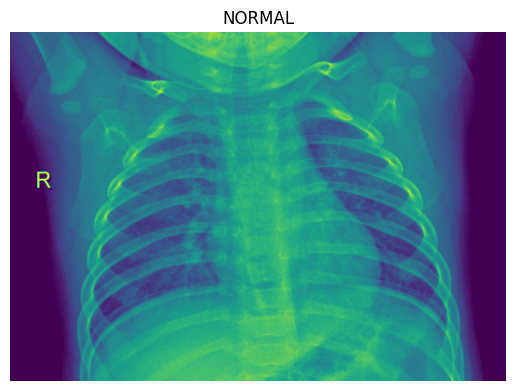

In [28]:
img = view_random_image("NORMAL")

Image shape: (1206, 1500)
Image name = NORMAL2-IM-1221-0001.jpeg


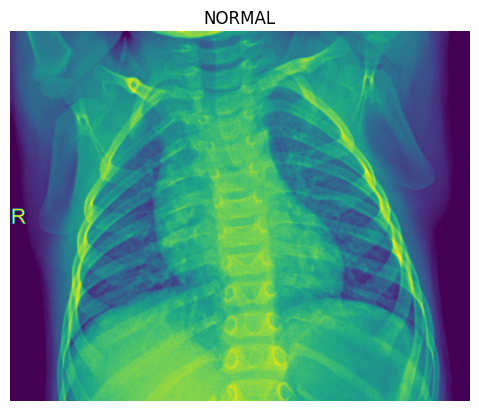

In [29]:
img = view_random_image("NORMAL")

Image shape: (1640, 1828)
Image name = person929_virus_1589.jpeg


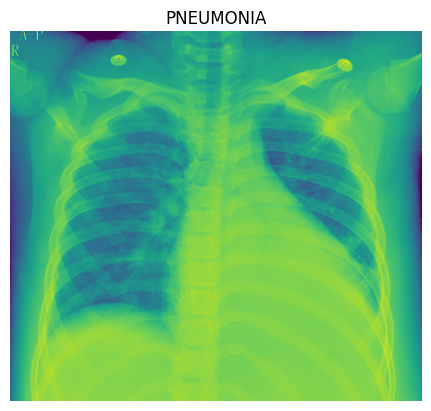

In [30]:
img = view_random_image("PNEUMONIA")

Image shape: (456, 816)
Image name = person1617_bacteria_4254.jpeg


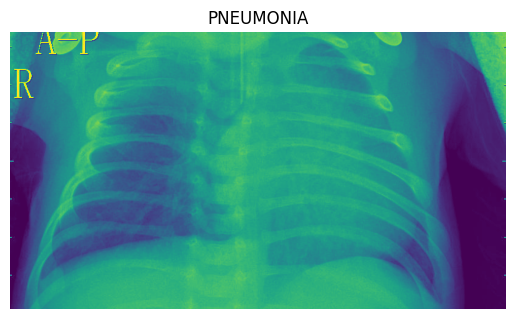

In [31]:
img = view_random_image("PNEUMONIA")

Image shape: (768, 1072)
Image name = person1476_bacteria_3843.jpeg


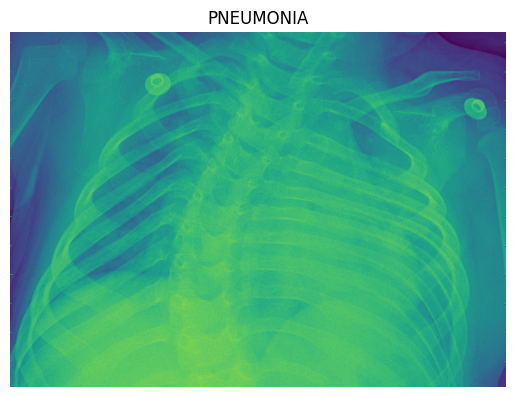

In [32]:
img = view_random_image("PNEUMONIA")

In [38]:
train_dir = "/content/chest_xray/train/"
val_dir = "/content/chest_xray/val/"
test_dir = "/content/chest_xray/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

val_data = val_datagen.flow_from_directory(val_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 3 classes.
Found 624 images belonging to 2 classes.


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
  Conv2D(100, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(50, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_1.fit(train_data, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))



Epoch 1/5
163/163 [==============================] - 114s 611ms/step - loss: 0.3958 - accuracy: 0.8280 - val_loss: -2.0088 - val_accuracy: 0.3750
Epoch 2/5
163/163 [==============================] - 99s 610ms/step - loss: 0.2290 - accuracy: 0.9099 - val_loss: -2.1576 - val_accuracy: 0.4375
Epoch 3/5
163/163 [==============================] - 100s 613ms/step - loss: 0.1991 - accuracy: 0.9237 - val_loss: -2.7985 - val_accuracy: 0.4375
Epoch 4/5
163/163 [==============================] - 100s 613ms/step - loss: 0.1940 - accuracy: 0.9233 - val_loss: -2.6858 - val_accuracy: 0.3125
Epoch 5/5
163/163 [==============================] - 100s 612ms/step - loss: 0.1791 - accuracy: 0.9293 - val_loss: -2.0926 - val_accuracy: 0.3125


In [40]:
model_1.evaluate(test_data)

20/20 [==============================] - 5s 222ms/step - loss: 0.3761 - accuracy: 0.8462


[0.3761339783668518, 0.8461538553237915]

In [41]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 100)     2800      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 111, 111, 100)     0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 50)      45050     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 54, 54, 50)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 20)        9020      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 26, 26, 20)       

**AUGEMNETED DATA**

In [42]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

In [43]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)

Found 5216 images belonging to 2 classes.


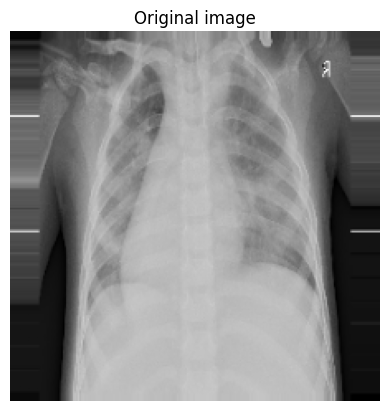

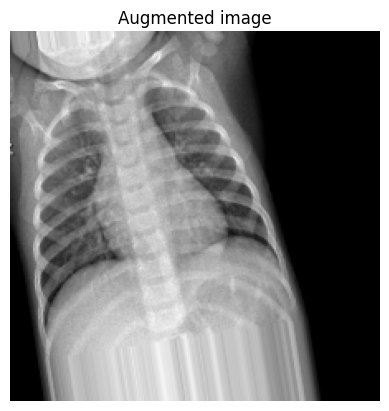

In [44]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

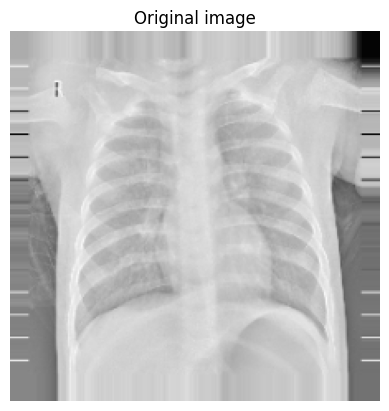

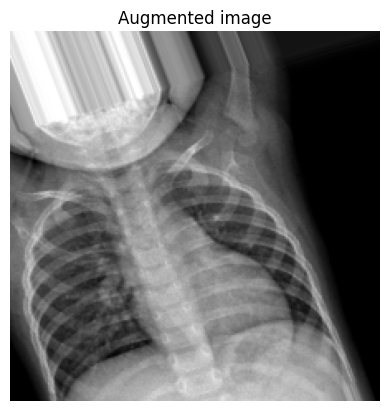

In [45]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [46]:
model_2 = Sequential([
  Conv2D(100, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(50, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(20, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
model_2.fit(train_data_augmented, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=val_data,
                        validation_steps=len(val_data))

Epoch 1/5
163/163 [==============================] - 103s 620ms/step - loss: 0.6033 - accuracy: 0.7529 - val_loss: -0.9958 - val_accuracy: 0.5000
Epoch 2/5
163/163 [==============================] - 102s 624ms/step - loss: 0.4928 - accuracy: 0.7465 - val_loss: 1.3764 - val_accuracy: 0.0000e+00
Epoch 3/5
163/163 [==============================] - 109s 671ms/step - loss: 0.4442 - accuracy: 0.7910 - val_loss: -0.7563 - val_accuracy: 0.3750
Epoch 4/5
163/163 [==============================] - 102s 623ms/step - loss: 0.3894 - accuracy: 0.8115 - val_loss: -0.3208 - val_accuracy: 0.3125
Epoch 5/5
163/163 [==============================] - 103s 631ms/step - loss: 0.3637 - accuracy: 0.8401 - val_loss: -0.1318 - val_accuracy: 0.3750


In [47]:
model_2.evaluate(test_data)

20/20 [==============================] - 6s 275ms/step - loss: 0.5139 - accuracy: 0.7484


[0.5139150619506836, 0.7483974099159241]